In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Load and Cleaning


In [62]:
dataset = pd.read_csv(
    "../dataset/Survey on the Impact of AI Tools on Students  (Responses) - Form Responses 1.csv",
    engine="pyarrow",
)

dataset.columns

Index(['Timestamp',
       'Which institute are you from? (e.g. BUET/BRAC/MIST/IUB/NSU/IUT/etc.)',
       'Academic Major Discipline', 'What is your gender?', 'Age(in Years)',
       'What is your Educational Level', 'Where are you located?',
       'Are you familiar with AI tools?',
       'Which AI tools are you familiar with? (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)',
       'I use AI tools for the following tasks:  (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)',
       'I regularly use/used AI for my studies and academic works',
       'When searching for something, I tend to use AI tools more than web or book resources',
       'When brainstorming for any ideas, I tend to use AI for that purpose',
       'I often use AI for decision-making tasks',
       'I regularly use AI plu

In [63]:
dataset.columns = dataset.columns.str.strip()

In [64]:
sns.set_theme(style="whitegrid")

# Demographic Analysis


### Age Distribution


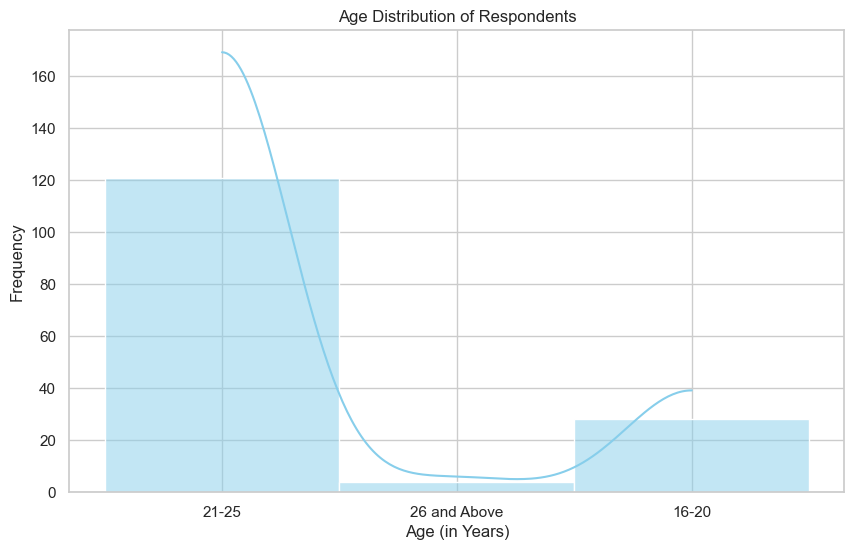

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset["Age(in Years)"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age (in Years)")
plt.ylabel("Frequency")
filename = "../results/age_distribution_of_respondents.png"
plt.show()

### Gender Ratio


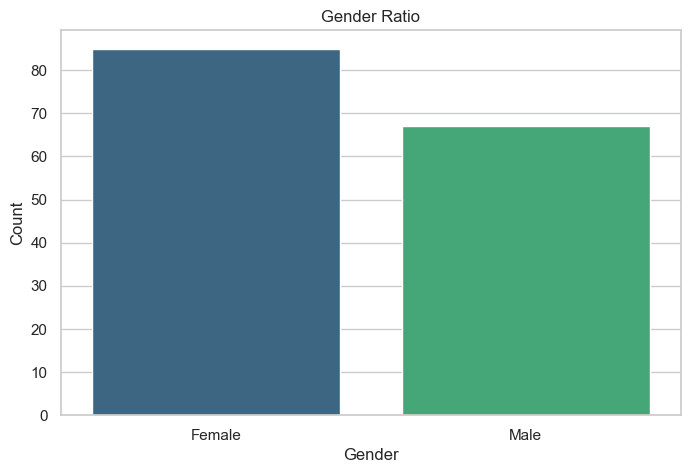

In [66]:
plt.figure(figsize=(8, 5))
gender_counts = dataset["What is your gender?"].value_counts()
gender_counts = gender_counts[gender_counts.index != "Helicopter"]
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    hue=gender_counts.index,
    palette="viridis",
    legend=False,
)
plt.title("Gender Ratio")
plt.xlabel("Gender")
plt.ylabel("Count")
filename = "../results/gender_ratio.png"
plt.savefig(filename)
plt.show()

### Educational Level and Academic Discipline


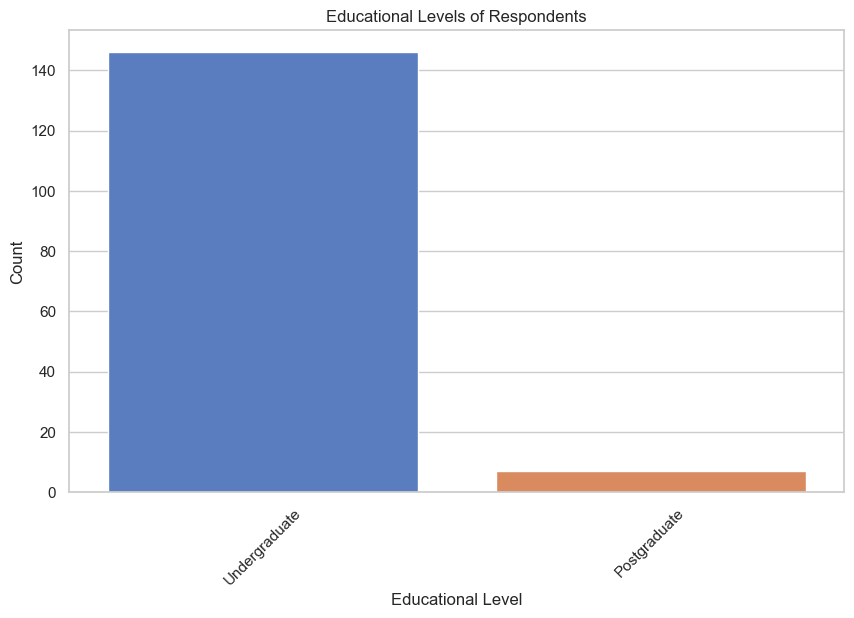

In [67]:
plt.figure(figsize=(10, 6))
edu_counts = dataset["What is your Educational Level"].value_counts()
sns.barplot(
    x=edu_counts.index,
    y=edu_counts.values,
    palette="muted",
    hue=edu_counts.index,
    legend=False,
)
plt.title("Educational Levels of Respondents")
plt.xlabel("Educational Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/educational_levels_of_respondents.png"
plt.savefig(filename)
plt.show()

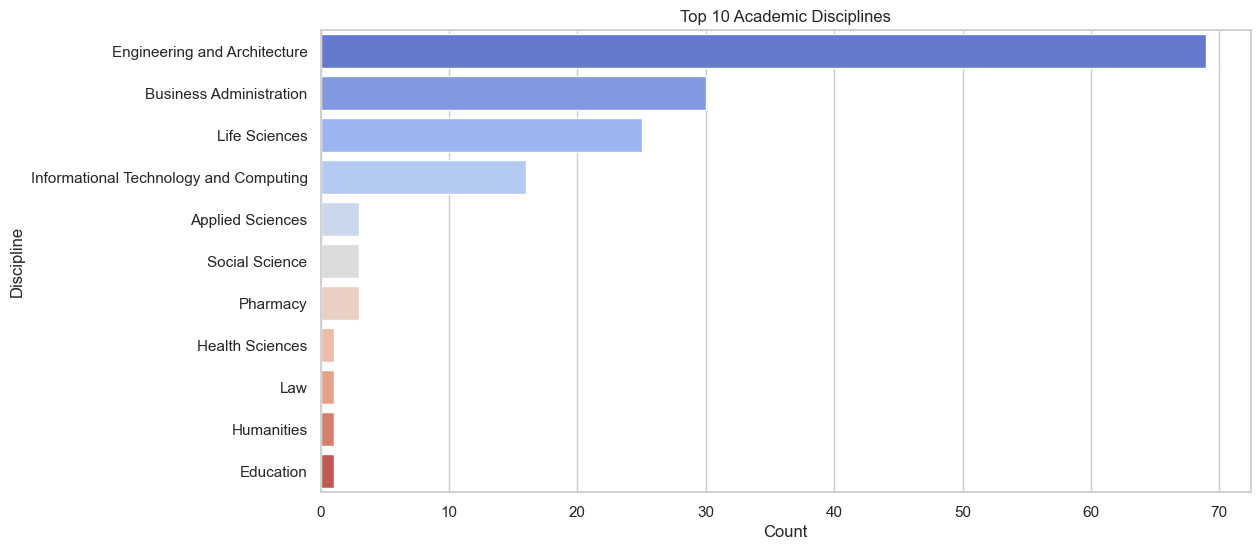

In [68]:
plt.figure(figsize=(12, 6))
major_counts = dataset["Academic Major Discipline"].value_counts()

# These two are more or less the same major, so we combine them
major_counts["Informational Technology and Computing"] += major_counts[
    "Informational Technology"
]
major_counts = major_counts.drop("Informational Technology")

sns.barplot(
    y=major_counts.index,
    x=major_counts.values,
    palette="coolwarm",
    hue=major_counts.index,
    legend=False,
)
plt.title("Top 10 Academic Disciplines")
plt.xlabel("Count")
plt.ylabel("Discipline")
filename = "../results/top_10_academic_disciplines.png"
plt.savefig(filename)
plt.show()

# AI Tools Familiarity and Usage Statistics


### AI Tools Familiarity


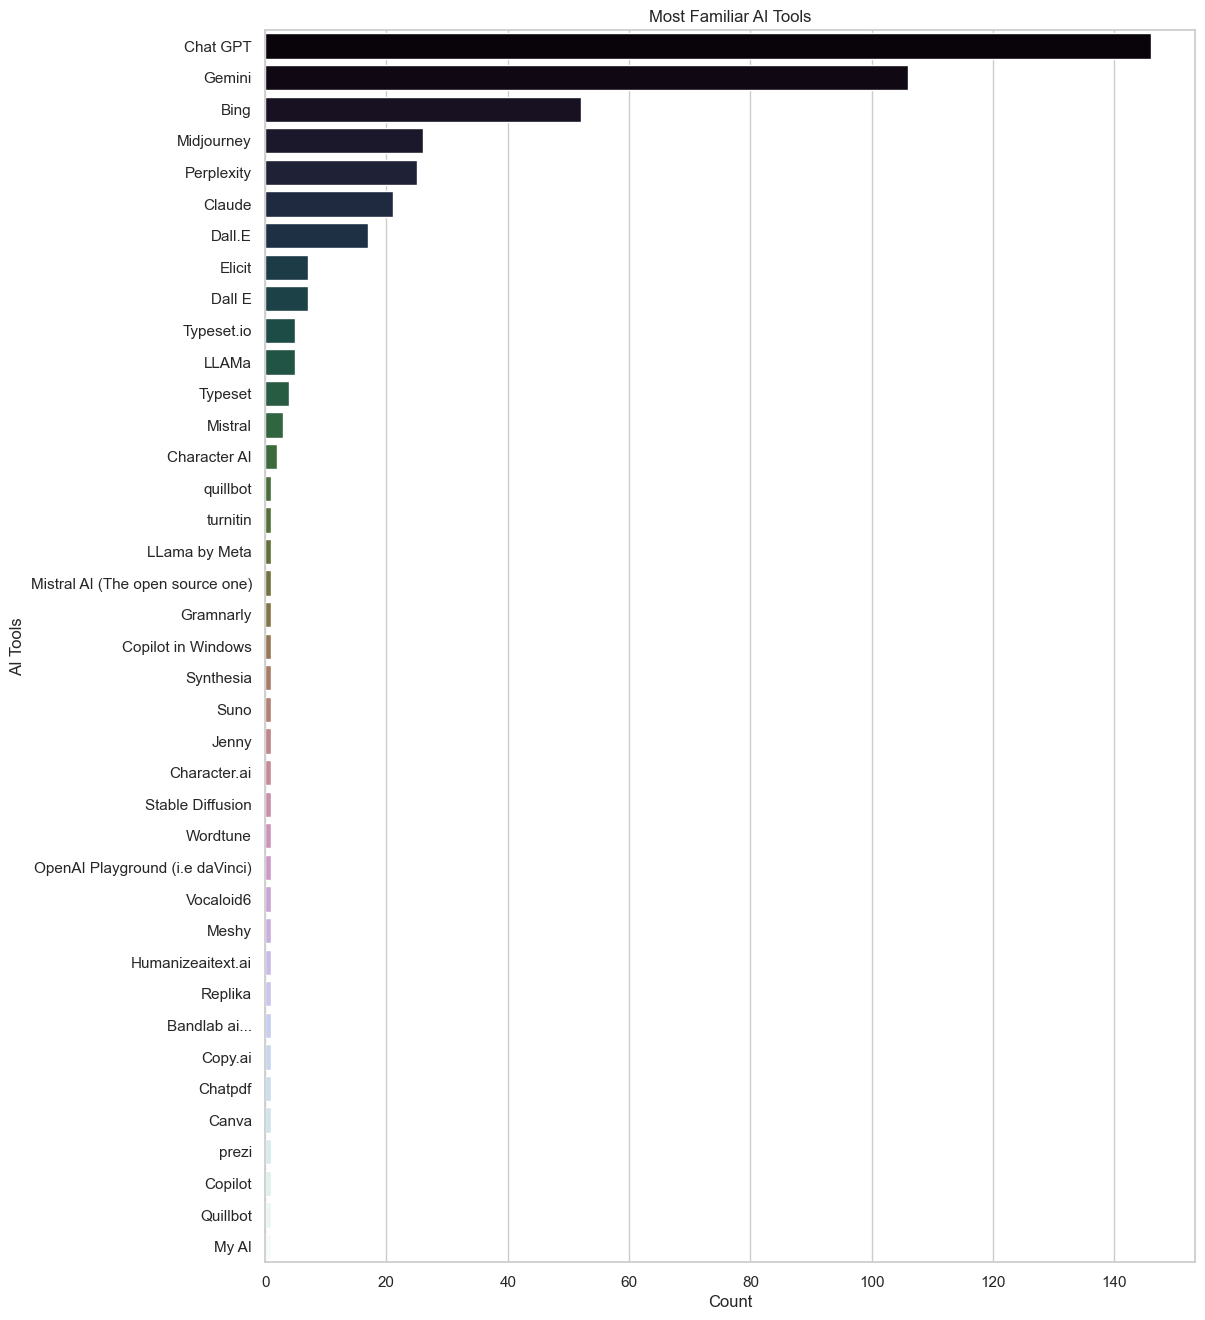

In [69]:
dataset["AI Tools Familiarity"] = dataset[
    'Which AI tools are you familiar with? (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)'
].str.split(",")

dataset["AI Usage Tasks"] = dataset[
    'I use AI tools for the following tasks:  (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)'
].str.split(",")

# Flatten the lists and count occurrences for familiarity
tools_familiarity = (
    dataset["AI Tools Familiarity"].dropna().explode().str.strip().value_counts()
)

# Plot the most familiar AI tools
plt.figure(figsize=(12, 16))
sns.barplot(
    y=tools_familiarity.index[:],
    x=tools_familiarity.values[:],
    palette="cubehelix",
    hue=tools_familiarity.index[:],
    legend=False,
)
plt.title("Most Familiar AI Tools")
plt.xlabel("Count")
plt.ylabel("AI Tools")
filename = "../results/most_familiar_ai_tools_all.png"
plt.savefig(filename)
plt.show()

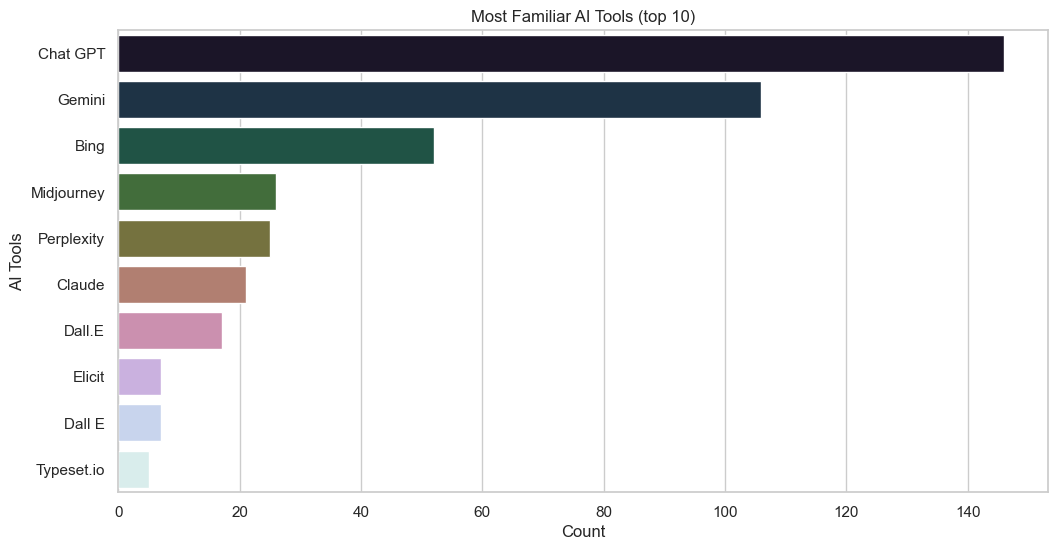

In [70]:
# Plot the most familiar AI tools (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(
    y=tools_familiarity.index[:10],
    x=tools_familiarity.values[:10],
    palette="cubehelix",
    hue=tools_familiarity.index[:10],
    legend=False,
)
plt.title("Most Familiar AI Tools (top 10)")
plt.xlabel("Count")
plt.ylabel("AI Tools")
filename = "../results/most_familiar_ai_tools_top_10.png"
plt.savefig(filename)
plt.show()

### AI Tools Usage


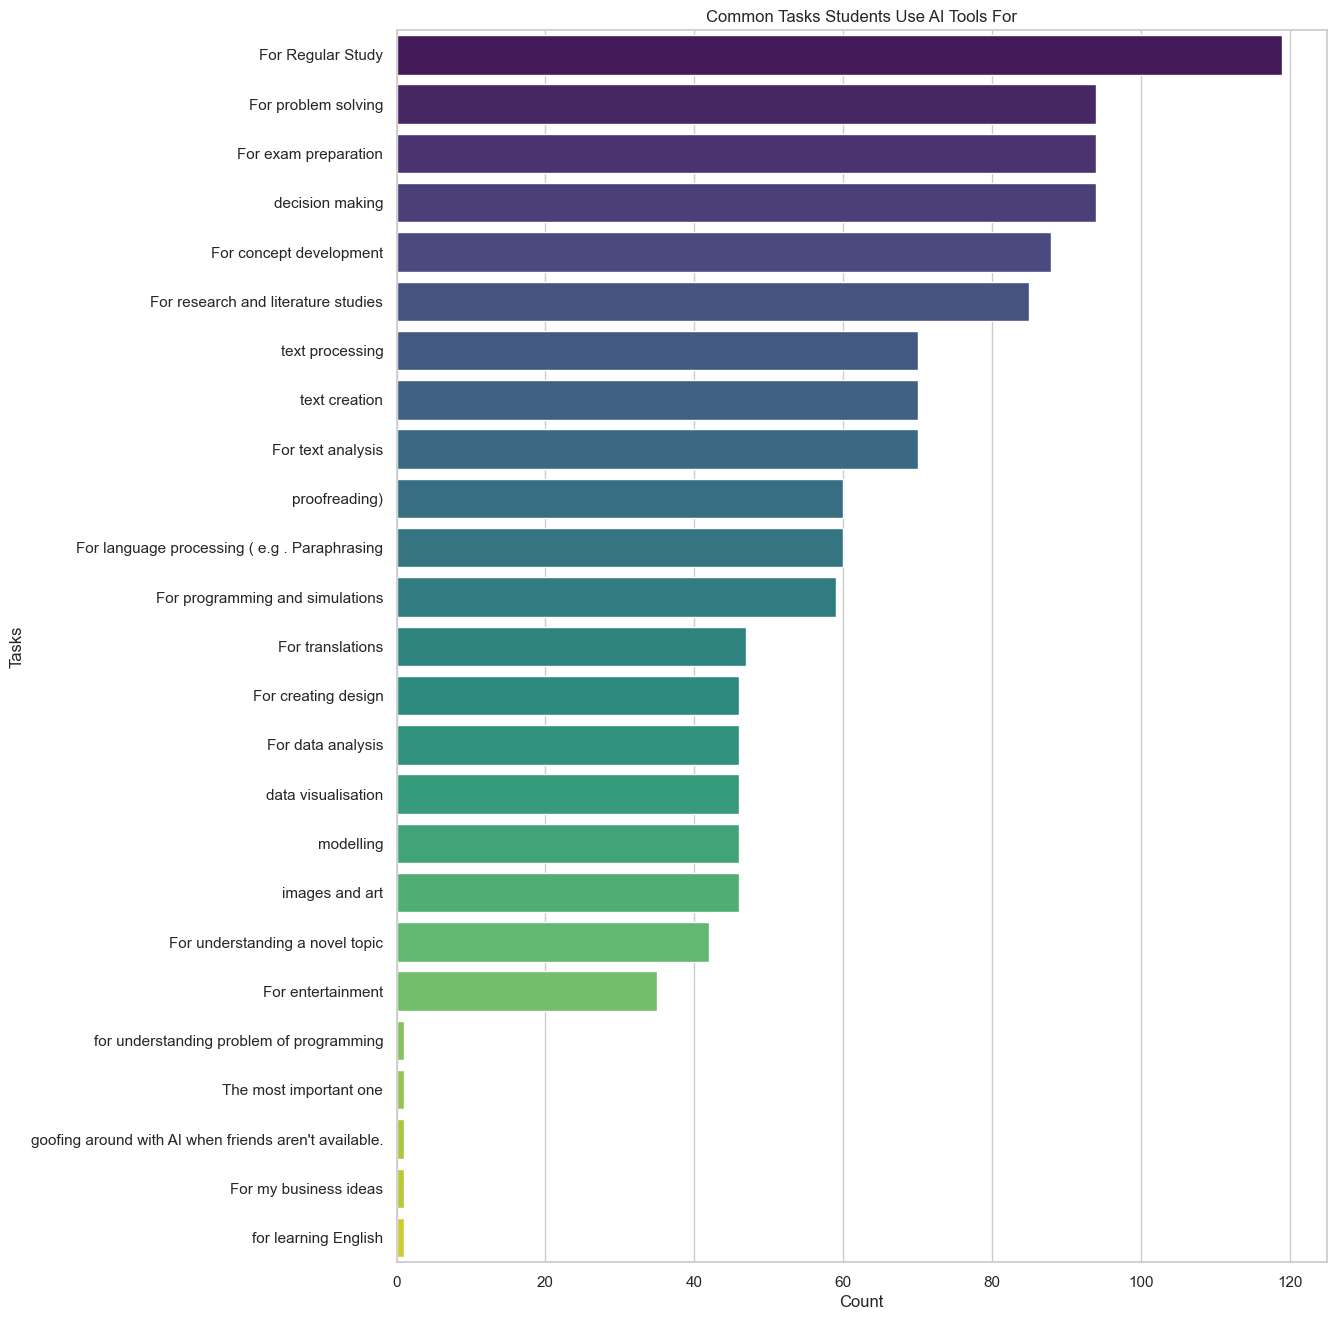

In [71]:
# Flatten the lists and count occurrences for usage tasks
tasks_usage = dataset["AI Usage Tasks"].dropna().explode().str.strip().value_counts()
tasks_usage = tasks_usage[tasks_usage.index != ""]

# Plot the common tasks for AI usage
plt.figure(figsize=(12, 16))
sns.barplot(
    y=tasks_usage.index[:],
    x=tasks_usage.values[:],
    palette="viridis",
    hue=tasks_usage.index[:],
    legend=False,
)
plt.title("Common Tasks Students Use AI Tools For")
plt.xlabel("Count")
plt.ylabel("Tasks")
filename = "../results/common_tasks_students_use_ai_tools_for_all.png"
plt.savefig(filename)
plt.show()

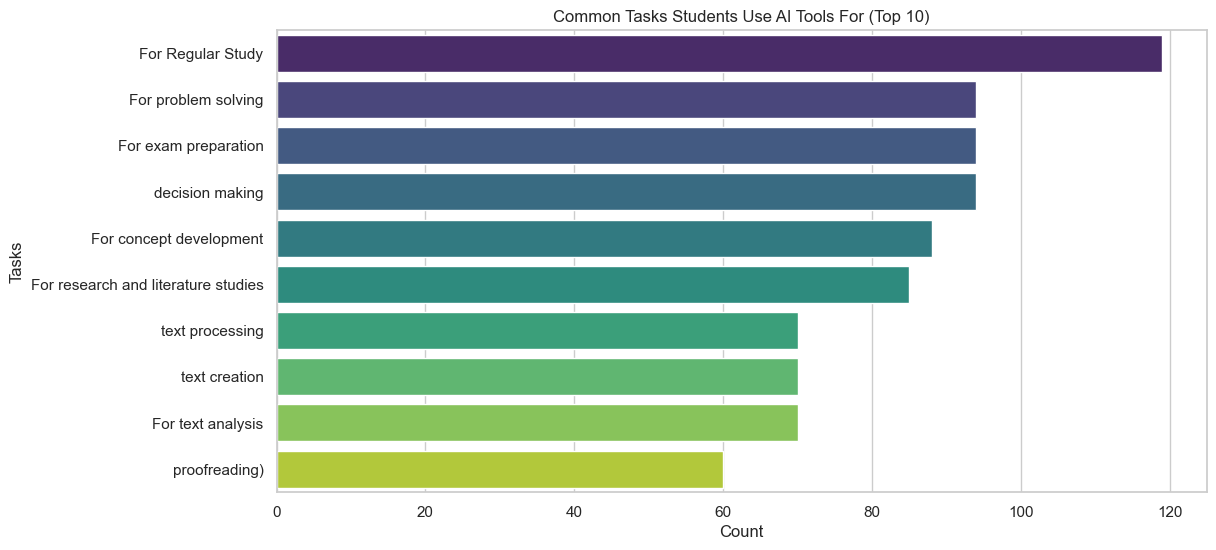

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(
    y=tasks_usage.index[:10],
    x=tasks_usage.values[:10],
    palette="viridis",
    hue=tasks_usage.index[:10],
    legend=False,
)
plt.title("Common Tasks Students Use AI Tools For (Top 10)")
plt.xlabel("Count")
plt.ylabel("Tasks")
filename = "../results/common_tasks_students_use_ai_tools_for_all_top_10.png"
plt.savefig(filename)
plt.show()

# Usage Trends


### Frequency of AI tool usage (Understanding Complex Topics)


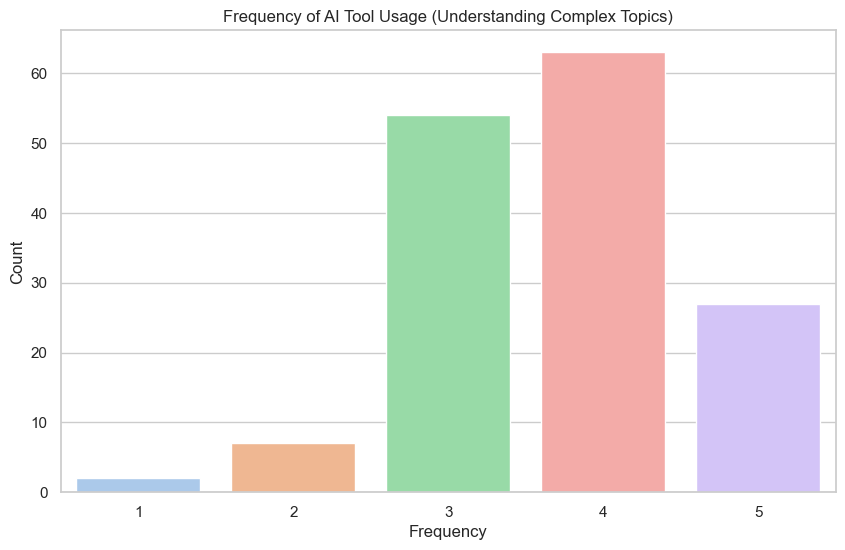

In [ ]:
plt.figure((figsize = (10, 6)));
usage_frequency =
  dataset[
    "How often do you rely on AI tools for help in understanding complex topics in your coursework?"
  ].value_counts();

usage_frequency.index = usage_frequency.index.map({
  Always: 5,
  Often: 4,
  Sometimes: 3,
  Rarely: 2,
  Never: 1,
});

sns.barplot(
  (x = usage_frequency.index),
  (y = usage_frequency.values),
  (palette = "pastel"),
  (hue = usage_frequency.index),
  (legend = False)
);
plt.title("Frequency of AI Tool Usage (Understanding Complex Topics)");
plt.xlabel("Frequency");
plt.ylabel("Count");
filename =
  "../results/frequency_of_ai_tool_usage_understanding_complex_topics.png";
plt.savefig(filename);
plt.show();


### Frequency of AI tool usage (Decision Making)


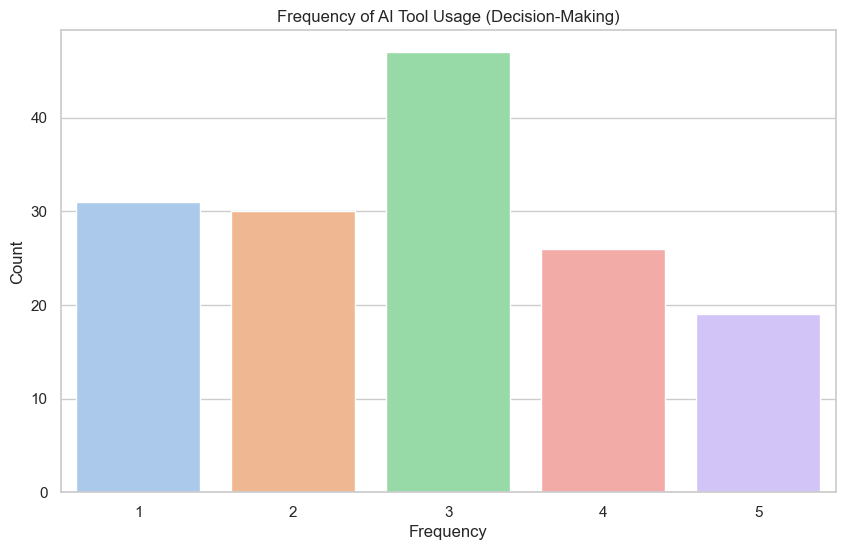

In [77]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset["I often use AI for decision-making tasks"].value_counts()

sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="pastel",
    hue=usage_frequency.index,
    legend=False,
)

plt.title("Frequency of AI Tool Usage (Decision-Making)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_decision_making.png"
plt.savefig(filename)

### Frequency of AI tool usage (Studies and Academics)


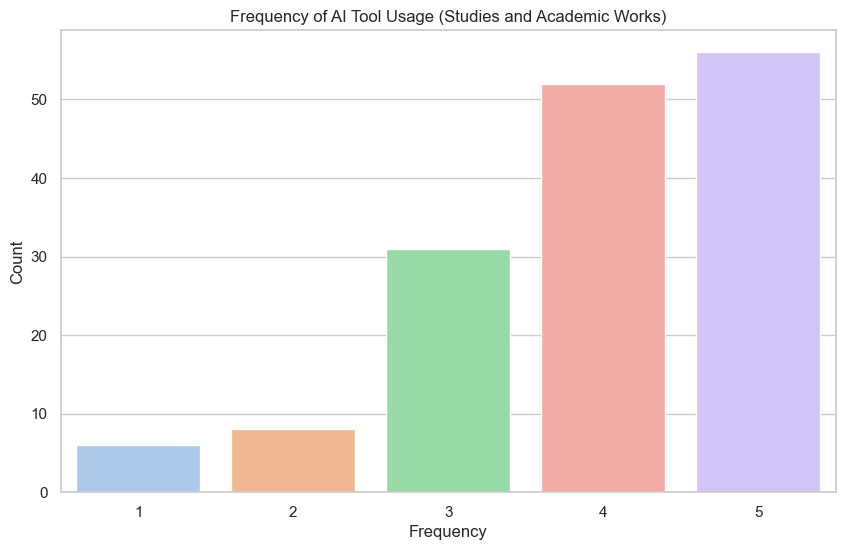

In [80]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset[
    "I regularly use/used AI for my studies and academic works"
].value_counts()

sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="pastel",
    hue=usage_frequency.index,
    legend=False,
)

plt.title("Frequency of AI Tool Usage (Studies and Academic Works)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_studies_academic_works.png"
plt.savefig(filename)
plt.show()

### Frequency of AI tool usage (Idea Generation)


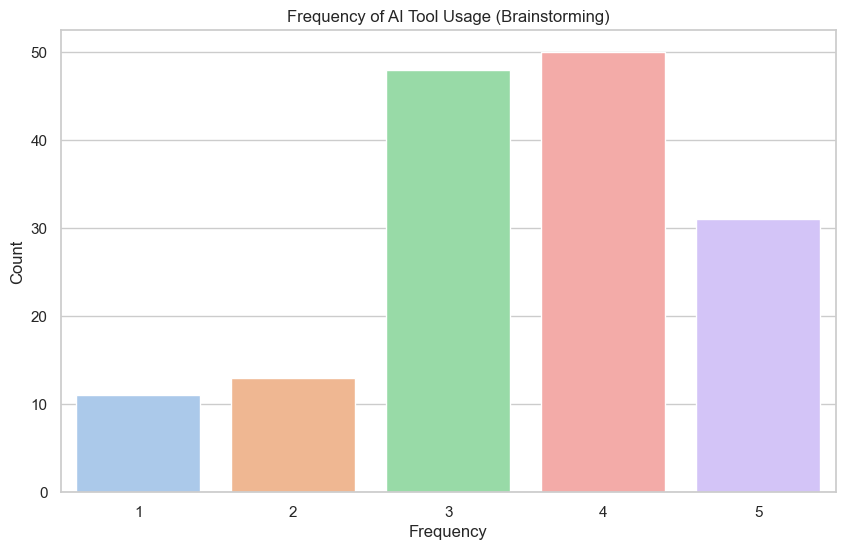

In [ ]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset[
    "When brainstorming for any ideas, I tend to use AI for that purpose"
].value_counts()

sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="pastel",
    hue=usage_frequency.index,
    legend=False,
)

plt.title("Frequency of AI Tool Usage (Brainstorming)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_brainstorming.png"
plt.savefig(filename)
plt.show()

### Combined Frequency of AI tool usage


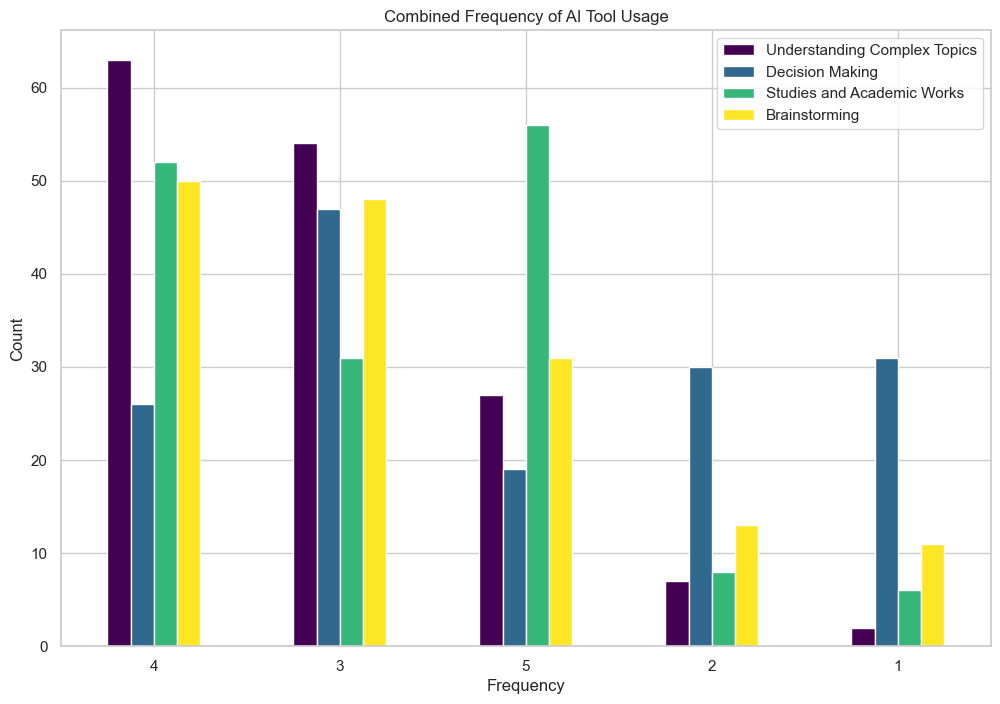

In [114]:
# Combine all the frequency of AI tool usage
usage_columns = [
    "How often do you rely on AI tools for help in understanding complex topics in your coursework?",
    "I often use AI for decision-making tasks",
    "I regularly use/used AI for my studies and academic works",
    "When brainstorming for any ideas, I tend to use AI for that purpose",
]

usage_frequency_1 = dataset[usage_columns[0]].value_counts()


# Convert the frequency to numerical values
usage_frequency_1.index = usage_frequency_1.index.map(
    {"Always": 5, "Often": 4, "Sometimes": 3, "Rarely": 2, "Never": 1}
)

usage_frequency_2 = dataset[usage_columns[1]].value_counts()
usage_frequency_3 = dataset[usage_columns[2]].value_counts()
usage_frequency_4 = dataset[usage_columns[3]].value_counts()

combined_usage_frequency = pd.concat(
    [usage_frequency_1, usage_frequency_2, usage_frequency_3, usage_frequency_4],
    axis=1,
    sort=False,
).fillna(0)

combined_usage_frequency.columns = [
    "Understanding Complex Topics",
    "Decision Making",
    "Studies and Academic Works",
    "Brainstorming",
]

# Plot the combined frequency of AI tool usage
plt.figure(figsize=(12, 8))
combined_usage_frequency.plot(kind="bar", colormap="viridis", ax=plt.gca())
plt.title("Combined Frequency of AI Tool Usage")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=0)
filename = "../results/combined_frequency_of_ai_tool_usage.png"
plt.savefig(filename)
plt.show()

# Preference for AI Tools Over Traditional Teaching Methods


### Trust in AI Tools vs Teachers


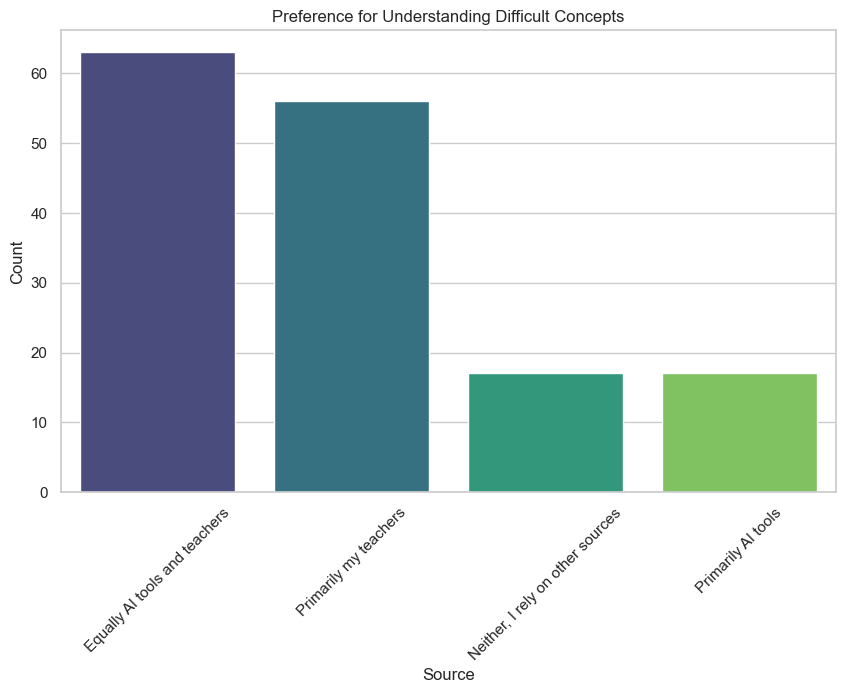

In [96]:
preference_data = dataset[
    "When it comes to understanding difficult concepts, which source do you trust more?"
].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)
plt.title("Preference for Understanding Difficult Concepts")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/preference_for_understanding_difficult_concepts.png"
plt.savefig(filename)
plt.show()

### Trust in Accuracy of Answers from AI Tools vs Teachers


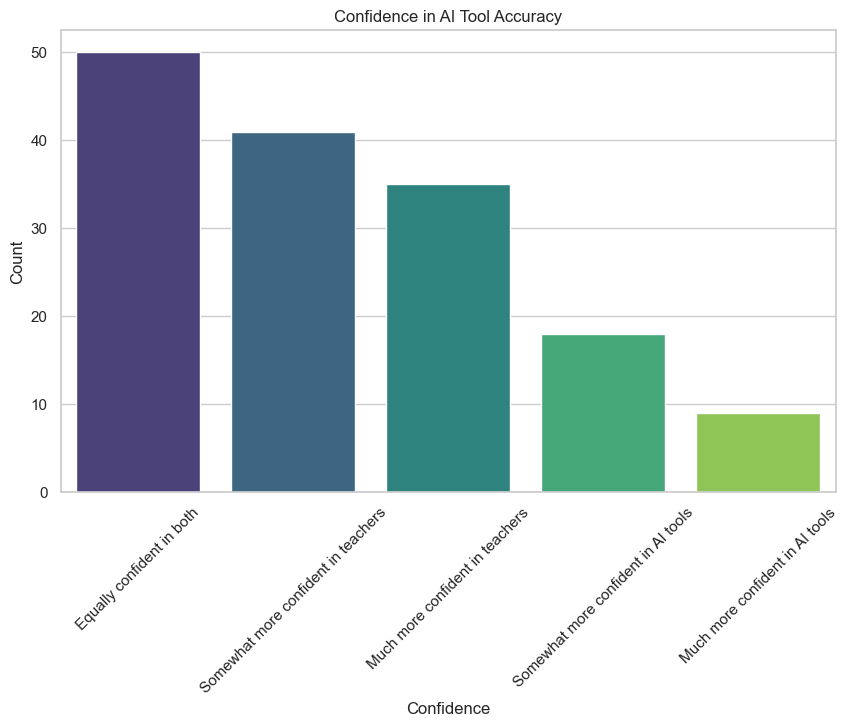

In [ ]:
preference_data = dataset[
    "How confident are you in the accuracy of answers provided by AI tools compared to your teachers’ explanations?"
].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)

plt.title("Confidence in AI Tool Accuracy")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/confidence_in_ai_tool_accuracy.png"
plt.savefig(filename)
plt.show()

### Bias in AI Tools vs Teachers


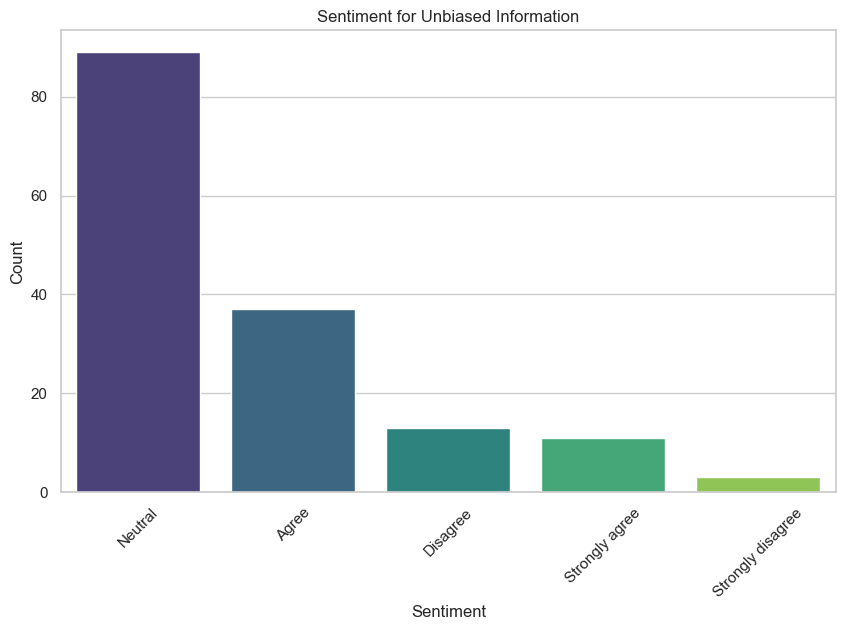

In [105]:
preference_data = dataset[
    "Do you feel that AI tools offer more unbiased information compared to teachers?"
].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)

plt.title("Sentiment for Unbiased Information")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/sentiment_for_unbiased_information.png"
plt.savefig(filename)
plt.show()

### Understanding Context of Assignments by AI Tools vs Teachers

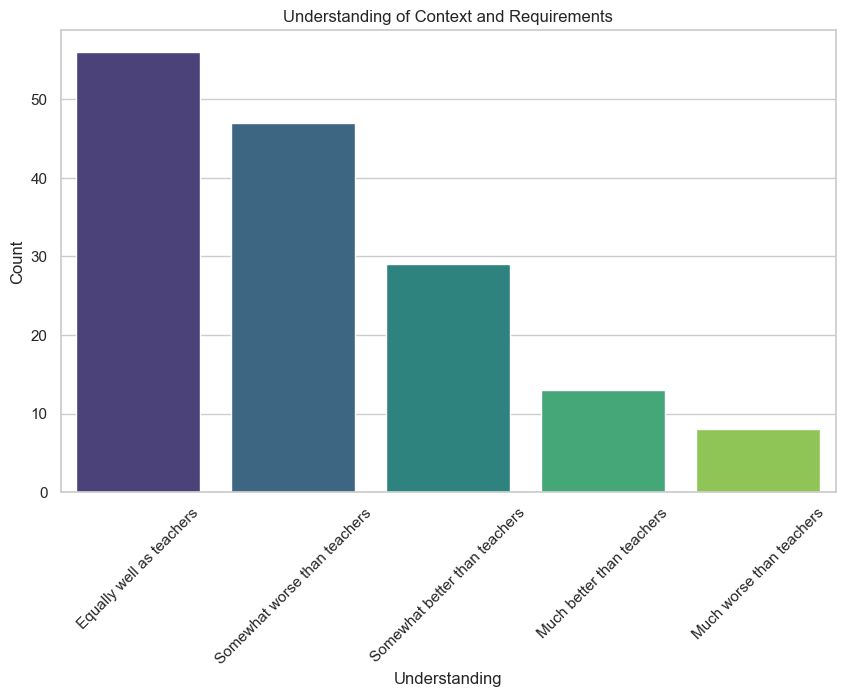

In [106]:
preference_data = dataset[
    "In your opinion, how well do AI tools understand the context and requirements of your assignments compared to your teachers?"
].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(
    x=preference_data.index,
    y=preference_data.values,
    palette="viridis",
    hue=preference_data.index,
    legend=False,
)

plt.title("Understanding of Context and Requirements")
plt.xlabel("Understanding")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/understanding_of_context_and_requirements.png"
plt.savefig(filename)
plt.show()

# Dependency on AI Tools for Work or Study

### AI Tools in Reducing Time Spent and work load

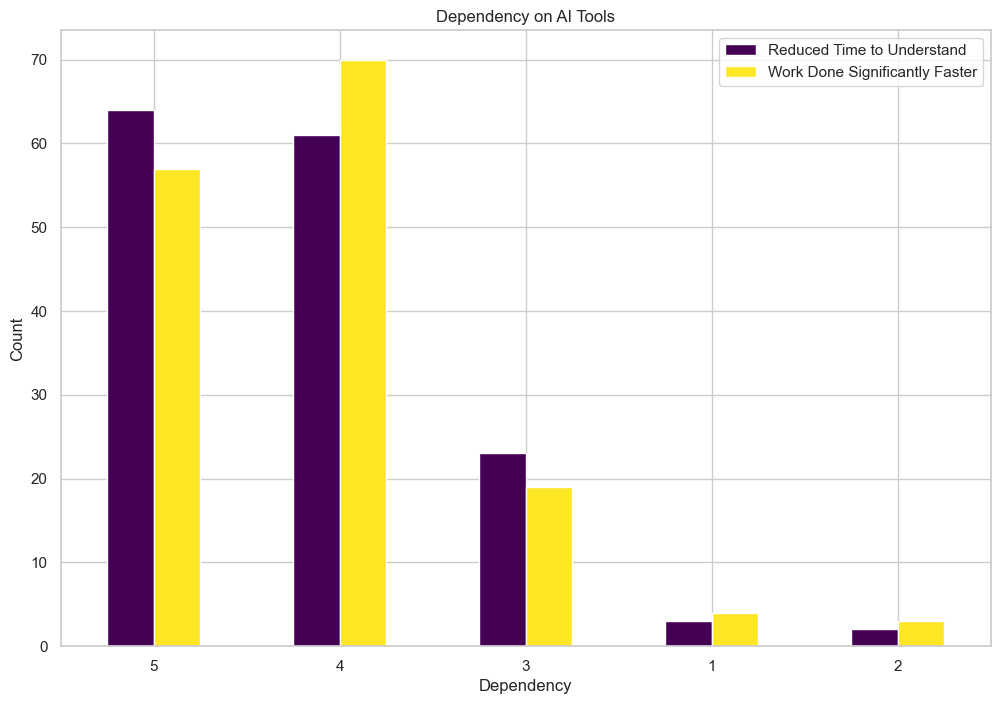

In [115]:
dependency_data_1 = dataset[
    "The use of AI tools reduced the time for me to understand a topic"
].value_counts()

dependency_data_2 = dataset[
    "AI tools enables me to do my work significantly faster"
].value_counts()

combined_dependency_data = pd.concat(
    [dependency_data_1, dependency_data_2], axis=1, sort=False
).fillna(0)

combined_dependency_data.columns = [
    "Reduced Time to Understand",
    "Work Done Significantly Faster",
]

plt.figure(figsize=(12, 8))

combined_dependency_data.plot(kind="bar", colormap="viridis", ax=plt.gca())

plt.title("Dependency on AI Tools")
plt.xlabel("Dependency")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend()
filename = "../results/dependency_on_ai_tools.png"
plt.savefig(filename)
plt.show()